In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

<h2> DataSet
    <h3> 전 예제에서 했던 것과는 다르게, 분류 카테고리가 3개이상이다. 그리고 로이터 데이터셋에는 46개의 토픽이 있습니다.

<h1>Classifying-newswires : multiclass classification

In [4]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


<h2> 로이터 데이터셋 로드하기
    <h3> numwords=10000

In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

8982개의 훈련샘플과 2246개의 테스트 샘플이 있다.

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


557056/550378 [==============================] - 1s 2us/step


 로이터 데이터셋을 텍스트로 디코딩하기 

In [11]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
train_labels[10]

3

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

NameError: name 'train_data' is not defined

데이터 인코딩 하기 => 이전 예제와 같은 방식으로 데이터를 벡터화 해줍니다.
    
    

In [22]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [24]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


<h2> 모델 정의하기
    <h3> input->Dense(units = 64) -> Dense(units = 64) -> Dense(units = 46) -> Outputs
        <h3> 마지막 Dense 층의 크기가 46이다.
            <h3> 마지막 층에 softmax 활성화 함수가 사용되었다.
                <h3> 각 입력 샘플마다 46개의 출력 클래스에 대한 확률분포를 출력합니다.

In [26]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

 <h2> 모델 컴파일 하기
    <h3> optimizer = rmsprop
        <h3> loss = categorical_crosentropy
            <h3> metrics : accuracy
                <h3> categorical_crossentropy : 두 확률 분표 사이의 거리를 측정한다. 
                    <h3> 네트워크가 출력한 확률분포와 진짜 레이블의 분포사이의 거리
    

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

훈련검증 : 1000개의 샘플을 따로 떼어서 검증세트로 사용하겠습니다.

In [28]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 282us/step - loss: 2.5340 - acc: 0.4946 - val_loss: 1.7249 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.4500 - acc: 0.6865 - val_loss: 1.3477 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.0972 - acc: 0.7646 - val_loss: 1.1707 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - ETA: 0s - loss: 0.8720 - acc: 0.815 - 1s 176us/step - loss: 0.8698 - acc: 0.8162 - val_loss: 1.0797 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 174us/step - loss: 0.7029 - acc: 0.8485 - val_loss: 0.9838 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.5661 - acc: 0.8800 - val_loss: 0.9396 - val_acc: 0.8050
Epoch 7/20
7982/7982 [============================

모델 훈련하기 epochs = 20, batch_size = 512

In [30]:
import matplotlib.pyplot as plt

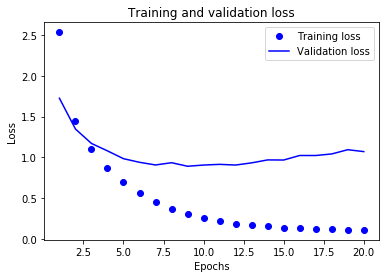

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


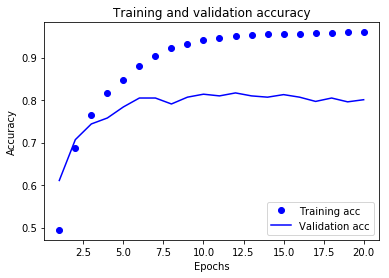

In [34]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9번째 에보크 이후에 과대적합이 시작됩니다. 아홉번의 에포크로 새로운 모델을 다시 훈련, 테스트에서 평가

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size=512,
         validation_data = (x_val, y_val))
results=model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 255us/step - loss: 2.5391 - acc: 0.5233 - val_loss: 1.6728 - val_acc: 0.6530
Epoch 2/9
7982/7982 [==============================] - 1s 184us/step - loss: 1.3710 - acc: 0.7122 - val_loss: 1.2749 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s 177us/step - loss: 1.0150 - acc: 0.7796 - val_loss: 1.1329 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.7993 - acc: 0.8247 - val_loss: 1.0527 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 2s 193us/step - loss: 0.6404 - acc: 0.8623 - val_loss: 0.9755 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.5131 - acc: 0.8918 - val_loss: 0.9095 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.4134 - acc: 0.9138 - val_loss: 0.8929 - val_acc: 0.8220
Epoch 8

epochs = 9

In [37]:
results


[1.02180863106134, 0.7764915405695499]

In [39]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)


0.19857524487978628

In [40]:
predictions =model.predict(x_test)

In [41]:
predictions[0].shape


(46,)

In [43]:
np.sum(predictions[0])

1.0

In [44]:
np.argmax(predictions[0])

3

In [45]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [46]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 359us/step - loss: 3.2895 - acc: 0.1144 - val_loss: 2.7875 - val_acc: 0.2530
Epoch 2/20
7982/7982 [==============================] - 2s 228us/step - loss: 2.3207 - acc: 0.3393 - val_loss: 1.8942 - val_acc: 0.5810
Epoch 3/20
7982/7982 [==============================] - 2s 232us/step - loss: 1.6249 - acc: 0.5998 - val_loss: 1.5954 - val_acc: 0.6010
Epoch 4/20
7982/7982 [==============================] - 2s 240us/step - loss: 1.4055 - acc: 0.6245 - val_loss: 1.5089 - val_acc: 0.6120
Epoch 5/20
7982/7982 [==============================] - 2s 213us/step - loss: 1.2687 - acc: 0.6388 - val_loss: 1.4538 - val_acc: 0.6200
Epoch 6/20
7982/7982 [==============================] - 2s 281us/step - loss: 1.1564 - acc: 0.6666 - val_loss: 1.4219 - val_acc: 0.6640
Epoch 7/20
7982/7982 [==============================] - 2s 243us/step - loss: 1.0683 - acc: 0.7210 - val_loss: 1.4036 - val_acc: 0.6820


병목 현상이 발생되면, 정확도가 떨어지는 것을 확인 할 수 있다.